In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')


In [26]:
# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())
print(test_df.head())

   ID  MSSubClass  LotArea Street HouseStyle ExterQual BldgType LotConfig  \
0   1          60     8450   Pave     2Story        Gd     1Fam    Inside   
1   2          20     9600   Pave     1Story        TA     1Fam       FR2   
2   3          60    11250   Pave     2Story        Gd     1Fam    Inside   
3   4          70     9550   Pave     2Story        TA     1Fam    Corner   
4   5          60    14260   Pave     2Story        Gd     1Fam       FR2   

  OverallQual OverallCond  ... WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           7           5  ...          0           61              0   
1           6           8  ...        298            0              0   
2           7           5  ...          0           42              0   
3           7           5  ...          0           35            272   
4           8           5  ...        192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0          0            

In [27]:
# Replace 'Missing' with NaN
train_df.replace('Missing', np.nan, inplace=True)
test_df.replace('Missing', np.nan, inplace=True)

# Convert categorical variables to numerical values using one-hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [28]:
# Align the train and test dataframes by columns
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

# Add the target variable back to the train dataframe
train_df['SalePrice'] = pd.read_csv('train.csv')['SalePrice']


In [29]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_df_imputed = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)
test_df_imputed = pd.DataFrame(imputer.transform(test_df), columns=test_df.columns)


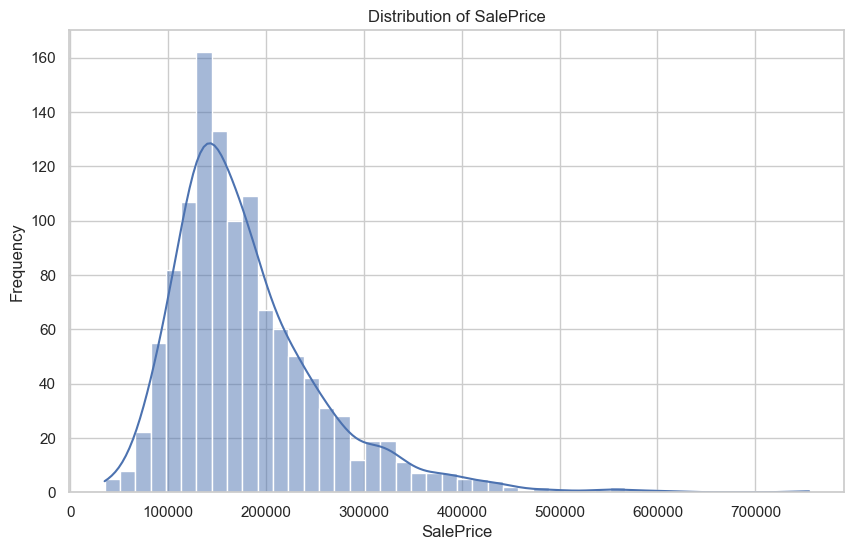

In [31]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_df_imputed['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Split data into features and target
X = train_df_imputed.drop(columns=['SalePrice'])
y = train_df_imputed['SalePrice']

In [33]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
# Train and evaluate models
def train_and_evaluate(X_train, y_train, X_val, y_val):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        results[name] = rmse
    return results

In [35]:
# Evaluate models
results = train_and_evaluate(X_train, y_train, X_val, y_val)
print("Model evaluation results:", results)

Model evaluation results: {'Linear Regression': 2219398.4466511, 'Random Forest': 29886.909432698558}


In [36]:
# Train final model
final_model = RandomForestRegressor(random_state=42)
final_model.fit(X, y)

RandomForestRegressor(random_state=42)

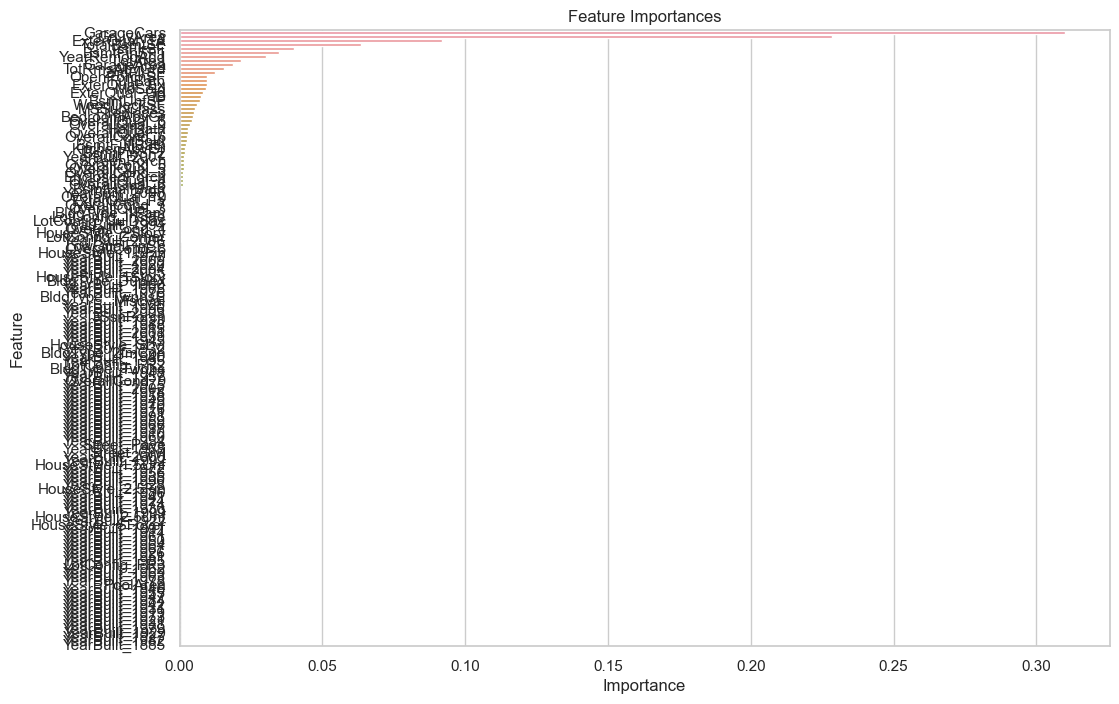

In [37]:
# Visualize feature importances
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [38]:
# Prepare test data
X_test = test_df_imputed.drop(columns=['SalePrice'])


In [39]:
# Predict on test data
test_predictions = final_model.predict(X_test)

In [40]:
# Save predictions
output = pd.DataFrame({'ID': pd.read_csv('test.csv')['ID'], 'SalePrice': test_predictions})
output.to_csv('predictions.csv', index=False)